# Project-------HeartDieseasePrediction

### Build a relevant machine learning model to predict whether person has heart disease or not

### Data description

In [ ]:
#Load the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report
from scipy.stats import kstest

In [2]:
# Load the dataset
df1=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\project-datamites\values.csv')
df2=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\project-datamites\labels.csv')
data = pd.merge(df1, df2, on='patient_id', how='inner')
data.head()
data.head(20)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
5,ldukkw,1,normal,130,3,0,0,0,180,0.0,1,42,150,0,0
6,2gbyh9,2,reversible_defect,150,4,2,0,2,258,2.6,0,60,157,0,1
7,daa9kp,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1,1
8,3nwy2n,3,reversible_defect,170,4,0,0,2,326,3.4,1,59,140,1,1
9,1r508r,2,normal,120,3,0,0,0,219,1.6,0,50,158,0,0


### Basic checks

In [3]:
#Shape of the data  
data.shape

(180, 15)

In [4]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [5]:
#checking of null values
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [6]:
#checking for duplicate values
data.duplicated().sum()

0

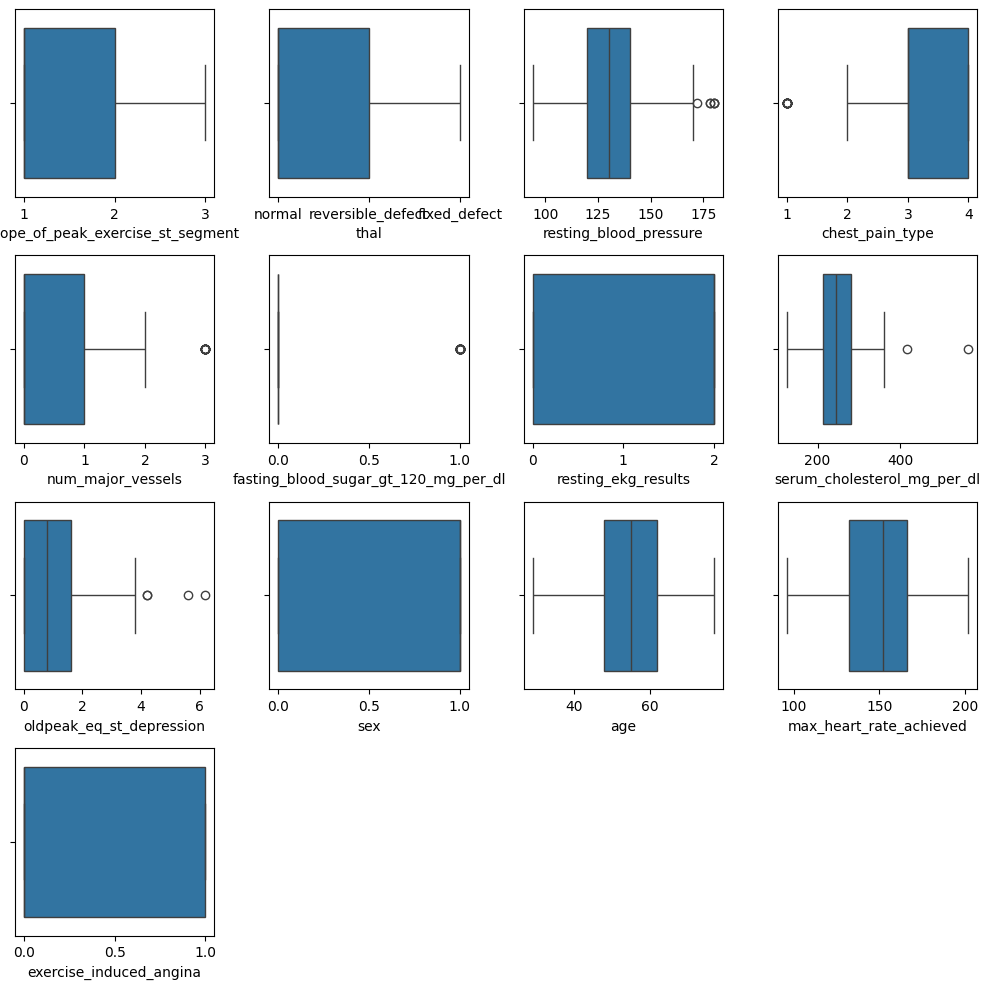

In [7]:
#checking for outliers
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data.drop(['patient_id','heart_disease_present'],axis=1):
    if plotnumber <= 15:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

### EDA

In [8]:
# Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


In [9]:
data.describe(include=['object']).T

,count,unique,top,freq
patient_id,180,180,0z64un,1
thal,180,3,normal,98


<Axes: xlabel='heart_disease_present', ylabel='count'>

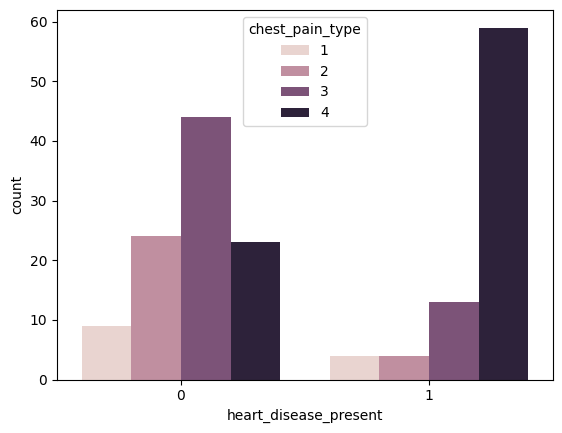

In [34]:
sns.countplot(x='heart_disease_present',hue='chest_pain_type',data=data)

C:\Users\User\AppData\Local\Temp\ipykernel_13628\1155801633.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[i])
C:\Users\User\AppData\Local\Temp\ipykernel_13628\1155801633.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[i])
C:\Users\User\AppData\Local\Temp\ipykernel_13628\1

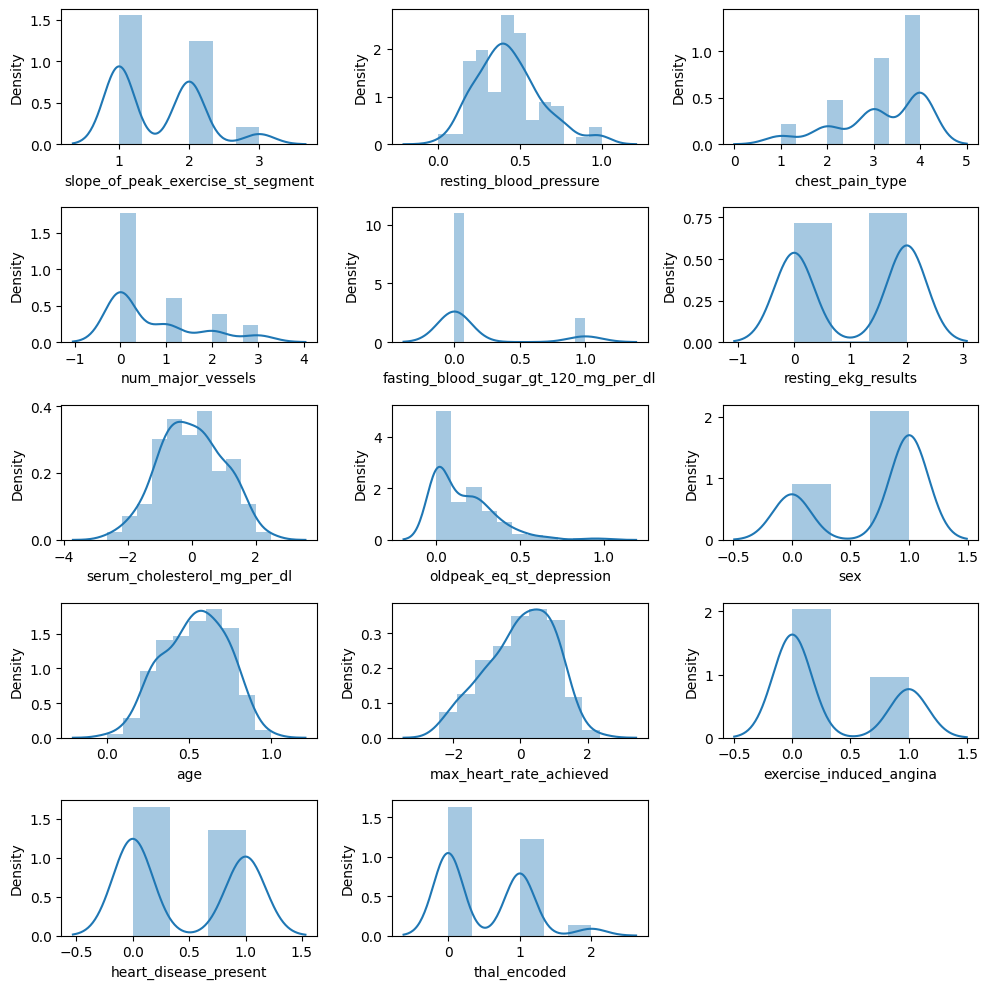

In [27]:
#SUBPLOT
plt.figure(figsize=(10,10))
plot = 1

for i in data:
    if plot<=14:
        ax = plt.subplot(5,3,plot)
        sns.distplot(x=data[i])
        plt.xlabel(i)
    plot+=1
plt.tight_layout()

Patient who have type 4 chest pain,have a high chance of getting heart disease 

In [10]:
#handeling outlier--we have got the outliers in serum_cholesterol_mg_per_dl column
Q1 = data['serum_cholesterol_mg_per_dl'].quantile(0.25)
Q3 = data['serum_cholesterol_mg_per_dl'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data= data[(data['serum_cholesterol_mg_per_dl'] >= lower_bound) & (data['serum_cholesterol_mg_per_dl'] <= upper_bound)]

In [11]:
#checking if the data is balanced or not
data['heart_disease_present'].value_counts()

heart_disease_present
0    98
1    80
Name: count, dtype: int64

In [12]:
# Perform KS test to check  normality of serum_cholesterol_mg_per_dl

ks_statistic, p_value = kstest(data['serum_cholesterol_mg_per_dl'], 'norm', args=(np.mean(data['serum_cholesterol_mg_per_dl']), np.std(data['serum_cholesterol_mg_per_dl'])))

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS Statistic: 0.046379068770578624
P-value: 0.821188655126454


serum_cholesterol_mg_per_dl is normally distributed

In [13]:
ks_statistic, p_value = kstest(data['max_heart_rate_achieved'], 'norm', args=(np.mean(data['max_heart_rate_achieved']), np.std(data['max_heart_rate_achieved'])))

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS Statistic: 0.07549898427616974
P-value: 0.24947033752181258


max_heart_rate_achieved is normally distributed

In [14]:
ks_statistic, p_value = kstest(data['resting_blood_pressure'], 'norm', args=(np.mean(data['resting_blood_pressure']), np.std(data['resting_blood_pressure'])))

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS Statistic: 0.12724176353000033
P-value: 0.00568728829768776


 resting_blood_pressure  is not normally distributed

In [15]:
data['thal'].value_counts()

thal
normal               97
reversible_defect    73
fixed_defect          8
Name: count, dtype: int64

### feature engineering


In [16]:
encoder = OrdinalEncoder(categories=[['normal','reversible_defect','fixed_defect']])
data['thal_encoded'] = encoder.fit_transform(data[['thal']])

In [17]:
data=data.drop(['patient_id','thal'],axis=1)

In [18]:
data.head(10)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_encoded
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0.0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0.0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0.0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,1.0
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,1.0
5,1,130,3,0,0,0,180,0.0,1,42,150,0,0,0.0
6,2,150,4,2,0,2,258,2.6,0,60,157,0,1,1.0
7,2,150,4,1,0,2,276,0.6,1,57,112,1,1,2.0
8,3,170,4,0,0,2,326,3.4,1,59,140,1,1,1.0
9,2,120,3,0,0,0,219,1.6,0,50,158,0,0,0.0


In [19]:
enco=StandardScaler()
scaler = MinMaxScaler()
data['resting_blood_pressure'] = scaler.fit_transform(data[['resting_blood_pressure']])
data['serum_cholesterol_mg_per_dl'] = enco.fit_transform(data[['serum_cholesterol_mg_per_dl']])#variables are normally distributed
data['oldpeak_eq_st_depression'] = scaler.fit_transform(data[['oldpeak_eq_st_depression']])
data['age'] = scaler.fit_transform(data[['age']])
data['max_heart_rate_achieved'] = enco.fit_transform(data[['max_heart_rate_achieved']])#variables are normally distributed
#data[''] = scaler.fit_transform(data[['']])

In [20]:
# Selecting features and target for model comparison
x = data.drop('heart_disease_present',axis=1)
y = data['heart_disease_present']


In [21]:
# Splitting the data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.30, random_state = 3)

### Model Building

In [22]:
#apply the logistic Regression
#import the algo
from sklearn.linear_model import LogisticRegression
# init
model = LogisticRegression()
# train the model
model.fit(x_train, y_train)

# test the model with new records
# x_test
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.83      0.73      0.78        26

    accuracy                           0.80        54
   macro avg       0.80      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



0.793956043956044


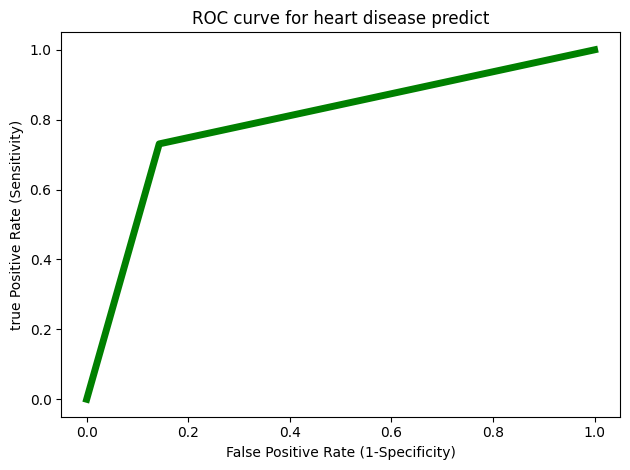

In [25]:
# Define and train model
#model = LogisticRegression()
#model.fit(x_train, y_train)
from sklearn.metrics import roc_curve,roc_auc_score


fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.title('ROC curve for heart disease predict')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('true Positive Rate (Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_pred))
plt.tight_layout()
plt.show()

In [28]:
#apply the XGBoost
#import the algo
from xgboost import XGBClassifier

model = XGBClassifier()
# train the model
model.fit(x_train,y_train)
# test the model with new records
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.68      0.71      0.70        21

    accuracy                           0.76        54
   macro avg       0.75      0.75      0.75        54
weighted avg       0.76      0.76      0.76        54



In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
treemodel=DecisionTreeClassifier(max_depth=2)
treemodel.fit(x_train,y_train)
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_dpred = treemodel.predict(x_test)
y_rpred = rf_model.predict(x_test)
print(classification_report(y_test,y_dpred))
print(classification_report(y_test,y_rpred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        33
           1       0.71      0.48      0.57        21

    accuracy                           0.72        54
   macro avg       0.72      0.68      0.68        54
weighted avg       0.72      0.72      0.71        54

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.71      0.71      0.71        21

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



### Model comparison
I have used Logistic Regression,Decision tree,Random Forest,XG Boost Model .I have got the accuracy score
.80,.70,.76,.78 respectively.
So Logistic regression model is best among them.

### Challenges faced
1-There was outliers in erum_cholesterol_mg_per_dl column.I have removed the outiers. 2-In resting_blood_pressure column,There was also some unusual observation but these points are not considerded as a outliers.That may be the actual value of variable..
3-some variables are in non numeric format.I have changed it into numeric format.

### Suggestions to the Hospital  to awake the predictions of heart diseases  prevent life threats
Deploy an automated alert system in the hospital to notify doctors of high-risk patients.
Create a mobile app or dashboard for healthcare providers to track patient risk levels in real time.
Set up AI-powered chatbots for preliminary patient screening and emergency recommendations.